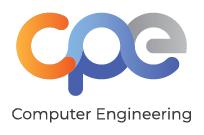

# Assignment8 Binary Search Tree

## Binary Search Tree

## สรุปสิ่งที่ได้เรียนรู้จากวันนี้

* Binary Search Tree (BST) - 


### Implement of TreeNode

In [28]:
class TreeNode:
    def __init__(self, key, value, leftChild=None, rightChild=None, parent=None):
        self.key = key
        self.payload = value
        self.leftChild = leftChild
        self.rightChild = rightChild
        self.parent = parent
        self.balanceFactor = 0
#### Additional method ####
    def hasLeftChild(self):
        return self.leftChild is not None

    def hasRightChild(self):
        return self.rightChild is not None

    def isLeftChild(self):
        return (self.parent and self.parent.leftChild) == self

    def isRightChild(self):
        return (self.parent and self.parent.rightChild) == self

    def isRoot(self):
        return self.parent is None

    def isLeaf(self):
        return not (self.rightChild or self.leftChild)

    def hasAnyChildren(self):
        return (self.rightChild is not None) or (self.leftChild is not None)

    def hasBothChildren(self):
        return (self.rightChild is not None) and (self.leftChild is not None)

    def replaceNodeData(self, key, value, leftChild, rightChild):
        self.key = key
        self.payload = value
        self.leftChild = leftChild
        self.rightChild = rightChild
        if self.hasLeftChild():
            self.leftChild.parent = self
        if self.hasRightChild():
            self.rightChild.parent = self

    def __repr__(self):
        return str((self.key,self.payload))

---

### Implement of Binary Search Tree

In [29]:
class BinarySearchTree():
    def __init__(self):
        self.root = None
        self.size = 0

    def __len__(self):
        return self.size
#----------------------------------#    
    def __setitem__(self, k, v):
        self.put(k, v)

    def put(self, key, val):
        if self.root: # There is already root then add it as child node.
            self._put(key, val, self.root)
        else:
            self.root = TreeNode(key, val) # if no root then promote it as root
            self.size += 1

    def _put(self, key, val, currentNode):
        if key == currentNode.key:  # Check the position
            currentNode.replaceNodeData(key,val,currentNode.leftChild,currentNode.rightChild) # if the same key then update new value
        else:
            if key < currentNode.key: # if the (new)key is less than the currentNode.key then add it as left child
                if currentNode.hasLeftChild(): # if there is already left child then add it as another left child
                    self._put(key, val, currentNode.leftChild)
                else:
                    currentNode.leftChild = TreeNode(key, val, parent=currentNode) #if there is no left child then add a new left child
                    self.size += 1
            else:
                if currentNode.hasRightChild():
                    self._put(key, val, currentNode.rightChild)
                else:
                    currentNode.rightChild = TreeNode(key, val, parent=currentNode)
                    self.size += 1
#----------------------------------#    
    def __getitem__(self, key):
        return self.get(key)

    def get(self, key):
        if self.root:
            res = self._get(key, self.root)
            if res:
                return res.payload
            else:
                return None
        else:
            return None

    def _get(self, key, currentNode):
        if not currentNode:
            return None
        elif currentNode.key == key:
            return currentNode
        elif key < currentNode.key:
            return self._get(key, currentNode.leftChild)
        else:
            return self._get(key, currentNode.rightChild)
#----------------------------------#    
    def __contains__(self, key):
        if self._get(key, self.root):
            return True
        else:
            return False
#----------------------------------#    
    def delete(self, key):
        if self.size > 1:
            nodeToRemove = self._get(key, self.root)
            if nodeToRemove:
                self.remove(nodeToRemove)
                self.size = self.size-1
            else:
                raise KeyError('Error, key not in tree')
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size = self.size - 1
        else:
            raise KeyError('Error, key not in tree')

    def __delitem__(self, key):
        self.delete(key)

    def findSuccessor(self):
        succ = None
        if self.hasRightChild():
            succ = self.findMin()
        else:
            if self.parent:
                if self.isLeftChild():
                    succ = self.parent
                else:
                    self.parent.rightChild = None
                    succ = self.parent.findSuccessor()
                    self.parent.rightChild = self
        return succ

    def findMin(self):
        current = self.root
        while current.hasLeftChild():
            current = current.leftChild
        return current
    
    def spliceOut(self):
        if self.isLeaf():
            if self.isLeftChild():
                self.parent.leftChild = None
            else:
                self.parent.rightChild = None
        elif self.hasAnyChildren():
            if self.hasLeftChild():
                if self.isLeftChild():
                    self.parent.leftChild = self.leftChild
                else:
                    self.parent.rightChild = self.leftChild
                self.leftChild.parent = self.parent
            else:
                if self.isLeftChild():
                    self.parent.leftChild = self.rightChild
                else:
                    self.parent.rightChild = self.rightChild
                self.rightChild.parent = self.parent

    def remove(self, currentNode):
        if currentNode.isLeaf():  # leaf
            if currentNode == currentNode.parent.leftChild:
                currentNode.parent.leftChild = None
            else:
                currentNode.parent.rightChild = None
        elif currentNode.hasBothChildren():  # interior
            succ = currentNode.findSuccessor()
            succ.spliceOut()
            currentNode.key = succ.key
            currentNode.payload = succ.payload

        else:  # this node has one child
            if currentNode.hasLeftChild():
                if currentNode.isLeftChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.leftChild
                elif currentNode.isRightChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.leftChild
                else:
                    currentNode.replaceNodeData(currentNode.leftChild.key,
                                                currentNode.leftChild.payload,
                                                currentNode.leftChild.leftChild,
                                                currentNode.leftChild.rightChild)
            else:
                if currentNode.isLeftChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.rightChild
                elif currentNode.isRightChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.rightChild
                else:
                    currentNode.replaceNodeData(currentNode.rightChild.key,
                                                currentNode.rightChild.payload,
                                                currentNode.rightChild.leftChild,
                                                currentNode.rightChild.rightChild)
    def inorder(self):
        result = []
        self._inorder_traversal(self.root, result)
        return result

    def _inorder_traversal(self, node, result):
        if node:
            self._inorder_traversal(node.leftChild, result)
            result.append((node.key, node.payload))
            self._inorder_traversal(node.rightChild, result)


Create a Binary Search Tree

In [30]:
BST = BinarySearchTree()

Add and Tree nodes (key and value are required) <br>
e.g. <br>
BST[0] = "red" <br>
50 is key <br>
"A" is value <br>

In [31]:
BST[50] = "A"
BST[17] = "blue"
BST[9] = "green"
BST[23] = "yellow"
BST[70] = "ball"
BST[72] = "is"
BST[14] = "in"
BST[12] = "the"
BST[19] = "jar"

Use inorder traveral to display the order of key in BST

In [32]:
BST.inorder()

[(9, 'green'),
 (12, 'the'),
 (14, 'in'),
 (17, 'blue'),
 (19, 'jar'),
 (23, 'yellow'),
 (50, 'A'),
 (70, 'ball'),
 (72, 'is')]

check the length(number of node) in BST

In [33]:
len(BST)

9

Check if key is exists

In [34]:
17 in BST

True

Get the value from key

In [35]:
BST[17]

'blue'

Update new value in same key

In [36]:
BST[17] = "purple"

In [37]:
BST[17]

'purple'

Add a new node

In [38]:
BST[4] = "brown"

In [39]:
len(BST)

10

In [40]:
BST.findMin()

(4, 'brown')

In [41]:
BST.inorder()

[(4, 'brown'),
 (9, 'green'),
 (12, 'the'),
 (14, 'in'),
 (17, 'purple'),
 (19, 'jar'),
 (23, 'yellow'),
 (50, 'A'),
 (70, 'ball'),
 (72, 'is')]

In [42]:
BST.delete(70)

In [43]:
BST.inorder()

[(4, 'brown'),
 (9, 'green'),
 (12, 'the'),
 (14, 'in'),
 (17, 'purple'),
 (19, 'jar'),
 (23, 'yellow'),
 (50, 'A'),
 (72, 'is')]

---

## Implement the AVL Tree by inherit from BST Class

In [44]:
class AVL(BinarySearchTree):
    def __init__(self):
        super().__init__()

    def _put(self, key, val, currentNode):
        if key == currentNode.key:
            currentNode.replaceNodeData(key,val,currentNode.leftChild,currentNode.rightChild)
        else:
            if key < currentNode.key:
                if currentNode.hasLeftChild():
                    self._put(key, val, currentNode.leftChild)
                else:
                    currentNode.leftChild = TreeNode(key, val, parent=currentNode)
                    self.size += 1
                    self.updateBalance(currentNode.leftChild)
            else:
                if currentNode.hasRightChild():
                    self._put(key, val, currentNode.rightChild)
                else:
                    currentNode.rightChild = TreeNode(key, val, parent=currentNode)
                    self.size += 1
                    self.updateBalance(currentNode.rightChild)

    def updateBalance(self, node):
        if node.balanceFactor > 1 or node.balanceFactor < -1:
            self.rebalance(node)
            return
        if node.parent is not None:
            if node.isLeftChild():
                node.parent.balanceFactor += 1
            elif node.isRightChild():
                node.parent.balanceFactor -= 1
            if node.parent.balanceFactor != 0:
                self.updateBalance(node.parent)

    def rebalance(self, node):
        if node.balanceFactor < 0:
            if node.rightChild.balanceFactor > 0:
                self.rotateRight(node.rightChild)
                self.rotateLeft(node)
            else:
                self.rotateLeft(node)
        elif node.balanceFactor > 0:
            if node.leftChild.balanceFactor < 0:
                self.rotateLeft(node.leftChild)
                self.rotateRight(node)
            else:
                self.rotateRight(node)
    # RotateLeft
    def rotateLeft(self, rotRoot):
        newRoot = rotRoot.rightChild
        rotRoot.rightChild = newRoot.leftChild
        if newRoot.leftChild is not None:
            newRoot.leftChild.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if rotRoot.isRoot():
            self.root = newRoot
        else:
            if rotRoot.isLeftChild():
                rotRoot.parent.leftChild = newRoot
            else:
                rotRoot.parent.rightChild = newRoot
        newRoot.leftChild = rotRoot
        rotRoot.parent = newRoot
        rotRoot.balanceFactor = rotRoot.balanceFactor + 1 - min(newRoot.balanceFactor, 0)
        newRoot.balanceFactor = newRoot.balanceFactor + 1 + max(rotRoot.balanceFactor, 0)
    # RotateRight
    def rotateRight(self, rotRoot):
        newRoot = rotRoot.leftChild
        rotRoot.leftChild = newRoot.rightChild
        if newRoot.rightChild is not None:
            newRoot.rightChild.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if rotRoot.isRoot():
            self.root = newRoot
        else:
            if rotRoot.isRightChild():
                rotRoot.parent.rightChild = newRoot
            else:
                rotRoot.parent.leftChild = newRoot
        newRoot.rightChild = rotRoot
        rotRoot.parent = newRoot
        rotRoot.balanceFactor = rotRoot.balanceFactor + 1 - min(newRoot.balanceFactor, 0)
        newRoot.balanceFactor = newRoot.balanceFactor + 1 + max(rotRoot.balanceFactor, 0)


In [45]:
AVL_Tree = AVL()

In [46]:
AVL_Tree[9] = "magenta"
AVL_Tree[8] = "gold"
AVL_Tree[5] = "silver"

In [47]:
AVL_Tree.inorder()

[(5, 'silver'), (8, 'gold'), (9, 'magenta')]

---

# `Assignment` <br>

Most of the BST operations (e.g.; search, max, min, insert, delete.. etc) use O(h) complexity time. <br>

* The cost of these operations may become O(n) for a unbalanced Binary tree. 
* To Keep the height of the tree (h) remains O(log n) after every insertion and deletion, is the key concept to optain
 __O(log n)__ for all these operations 


---

## The other type of the balanced BST:

## The <span style="color:red">Red</span> Black <span style="color:green">Tree</span>

a Red-Black tree is one kind of balanced tree structure for BST that take O(log n) time where n is the number of nodes in the tree. 

`Question`: <br>
1. What does the Red-Black Tree look like? <br>
2. How does it balance the BST <br>
3. How to implement them in Python

Red-Black Tree คือ การทำให้ BST อยู่ในรูปแบบที่สมดุลในอีกรูปแบบนึง นอกจาก AVL Tree โดยมีเงื่อนไขคือ<br>
1. Node จะเป็นสีแดงหรือสีดำ
2. ราก (Root) จะต้องเป็นสีดำ
3. ใบ (Leaf) ทุกใบจะต้องเป็นสีดำ
4. ลูกของ Node ที่เป็นสีแดงจะต้องเป็นสีดำ
5. ทุก ๆ Path ทางเดินที่ผ่านแต่ละ Node เพียงครั้งเดียวจากรากไปยังใบจะผ่านจำนวน Node สีดำเท่ากัน <br>

โดยเราจะใช้หลักการที่เวลาเราเพิ่มโหนดใหม่เข้าไป มันจะมีสีโหนดเป็น


In [194]:
class RedBlackNode(TreeNode):
    def __init__(self, key, value,color, leftChild=None, rightChild=None, parent=None):
        self.key = key
        self.payload = value
        self.color = color
        self.leftChild = leftChild
        self.rightChild = rightChild
        self.parent = parent

In [203]:
class RedBlackTree(AVL):
    def __init__(self):
        super().__init__()

    def put(self, key, val):
        if self.root: # There is already root then add it as child node.
            self._put(key, val, self.root)
        else:
            # ในกรณีที่เราเพิ่มไปแล้วมันเป็น Root ให้เรากำหนดมันเป็นสีดำ
            self.root = RedBlackNode(key, val, "black") # if no root then promote it as root
            self.size += 1

    # ขออนุญาตเขียน _put จากแบบ Recursive เป็น While Loop แทนนะครับ
    def _put(self, key, val, currentNode):
        if key == currentNode.key:
            color = currentNode.color
            currentNode.replaceNodeData(key,val,color,currentNode.leftChild,currentNode.rightChild)
        else:
            if key < currentNode.key:
                if currentNode.hasLeftChild():
                    self._put(key, val, currentNode.leftChild)
                else: # ในกรณีที่มันไม่มีแล้ว
                    currentNode.leftChild = RedBlackNode(key, val, "red" , parent=currentNode)
                    self.size += 1

                    # เช็คว่าจำเป็นที่จะต้องเรียกใช้ fixInsert Method หรือไม่

                    # ดัก root อีกรอบ
                    if currentNode.leftChild.parent == None :                       
                        currentNode.color = "black"
                        return
                    if currentNode.leftChild.parent.parent == None:
                        return
                    self.fixInsert(currentNode.leftChild)

            else:
                if currentNode.hasRightChild():
                    self._put(key, val, currentNode.rightChild)

                else:
                    currentNode.rightChild = RedBlackNode(key, val, "red" , parent=currentNode)
                    self.size += 1
                    # ดัก root ไว้อีกรอบหนึ่ง
                    if currentNode.rightChild.parent == None :                       
                        currentNode.color = "black"
                        return
                    
                    # เช็คอีกรอบว่าจำเป็นต้อง fixInsert หรือไม่
                    if currentNode.rightChild.parent.parent == None:
                        return
                    
                    self.fixInsert(currentNode.rightChild)


    def fixInsert(self, node):

        # ในขณะที่ยังมี Parent และ Parent ยังเป็นสีแดงอยู่ให้ทำต่อไปเรื่อย ๆ 
        while node.parent and node.parent.color == "red":
                # หา Uncle ของ Node ว่าเป็น Uncle ที่อยู่ซ้ายหรือขวาจาก Grandparent
                if (node.parent == node.parent.parent.leftChild):
                    uncle = node.parent.parent.rightChild
                    
                    # กรณีที่ 1 - Uncle ของ Node เป็น สีแดง และอยู่ทางขวาของ Grandparent
                    if uncle and uncle.color == "red":
                        node.parent.parent.color = "red"
                        node.parent.color = "black"
                        uncle.color = "black"
                        node = node.parent.parent # ขยับขึ้นไปต่อ

                    # กรณีที่ 2 - Uncle ของ Node เป็นสีดำ และอยู่ทางขวาของ Grandparent

                    else:
                        ''' 
                        ต่อมาเราจะเช็คด้วยว่าในกรณีที่ Uncle เป็นสีดำนั้น มันอยู่เป็น Triangle หรือ Line 

                            Grandparent
                            /         \
                        Parent         Uncle          Triangle (Parent เป็น Left และ Node เป็น Right) (case 2.1)
                        \                          มันจะหักมุมเป็นสามเหลี่ยมพอดี
                            Node

                            
                            Grandparent
                            /          \ 
                        Parent          Uncle           Line (Parent เป็น Left และ Node เป็น Left) (case 2.2)
                        /                              มันจะคล้ายกับเส้นตรง
                    Node



                        '''
                        if (node == node.parent.rightChild): #เช็คในกรณีที่เป็น Triangle (case 2.1)
                            node = node.parent
                            self.rotateLeft(node)
                        node.parent.color = "black" # ที่เหลือคือกรณีที่เป็น Line (case 2.2)
                        node.parent.parent.color = "red"
                        self.rotateRight(node.parent.parent)


                elif (node.parent == node.parent.parent.rightChild) :
                    uncle = node.parent.parent.leftChild
                    
                    # กรณีที่ 3 - Uncle ของ Node เป็น สีแดง และอยู่ทางซ้ายของ Grandparent
                    if uncle and uncle.color == "red":
                        node.parent.parent.color = "red"
                        node.parent.color = "black"
                        uncle.color = "black"
                        node = node.parent.parent # ขยับขึ้นไปต่อ

                    # กรณีที่ 4 - Uncle ของ Node เป็นสีดำ และอยู่ทางซ้ายของ Grandparent

                    else:
                        ''' 
                        ต่อมาเราจะเช็คด้วยว่าในกรณีที่ Uncle เป็นสีดำนั้น มันอยู่เป็น Triangle หรือ Line 

                            Grandparent
                            /         \
                        Uncle         Parent         Triangle (Parent เป็น Right และ Node เป็น Left) 
                                    /             
                                    Node

                            
                            Grandparent
                            /          \ 
                        Uncle          Parent           Line (Parent เป็น Right และ Node เป็น Right)
                                        \                          
                                        Node

                        '''
                        if (node == node.parent.leftChild): #เช็คในกรณีที่เป็น Triangle (case 4.1)
                            node = node.parent
                            self.rotateRight(node)
                        node.parent.color = "black" # ที่เหลือคือกรณีที่เป็น Line (case 4.2)
                        node.parent.parent.color = "red"
                        self.rotateLeft(node.parent.parent)

                if node == self.root:
                    break

        self.root.color = "black"

            # หมายเหตุ : เคสที่ต้องดัก ถ้าหากเรา Insert แล้วมันเป็น Root เขียนอยู่ใน put method เรียบร้อยแล้ว แต่ดักอีกรอบก็ไม่เป็นไร

    # RotateLeft
    def rotateLeft(self, rotRoot):
        newRoot = rotRoot.rightChild
        rotRoot.rightChild = newRoot.leftChild
        if newRoot.leftChild is not None:
            newRoot.leftChild.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if rotRoot.isRoot():
            self.root = newRoot
        else:
            if rotRoot.isLeftChild():
                rotRoot.parent.leftChild = newRoot
            else:
                rotRoot.parent.rightChild = newRoot
        newRoot.leftChild = rotRoot
        rotRoot.parent = newRoot


    # RotateRight
    def rotateRight(self, rotRoot):
        newRoot = rotRoot.leftChild
        rotRoot.leftChild = newRoot.rightChild
        if newRoot.rightChild is not None:
            newRoot.rightChild.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if rotRoot.isRoot():
            self.root = newRoot
        else:
            if rotRoot.isRightChild():
                rotRoot.parent.rightChild = newRoot
            else:
                rotRoot.parent.leftChild = newRoot
        newRoot.rightChild = rotRoot
        rotRoot.parent = newRoot


    # Overriding the Delete Method
    def delete(self, key):
        if self.size > 1:
            nodeToRemove = self._get(key, self.root)
            if nodeToRemove:
                self.BlackRedRemove(nodeToRemove)
                self.size = self.size-1
            else:
                raise KeyError('Error, key not in tree')
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size = self.size - 1
        else:
            raise KeyError('Error, key not in tree')
        
    # เป็น Method ที่สร้างมาเพื่อตัดเส้นเชื่อม (ความสัมพันธ์) ให้หายไปจาก Tree
    # วิธีการก็คือ มันจะเชื่อมระหว่าง u.parent กับ v ที่เป็นตัวเชื่อมต่อจาก u อีกที สรุปคือ u จะหายไปจากความสัมพันธ์
    def transplant(self, u, v):
        if u.parent == None: # กรณีตัวที่จะลบเป็น Root
            self.root = v
        elif u == u.parent.leftChild: # กรณีตัวที่จะลบเป็น Left Child
            u.parent.leftChild = v # 
        else: # กรณีตัวที่จะลบเป็น Right Child 
            u.parent.rightChild = v
        if v and u.parent:
            v.parent = u.parent


    def BlackRedRemove(self, node):
        
        y = node
        y_original_color = y.color

        # Case 1 - LeftChild ไม่มี node อยู่ แต่ RightChild มี
        if node.leftChild == None:
            x = node.rightChild
            self.transplant(node, node.rightChild)

        # Case 2 - RightChild ไม่มี แต่ LeftChild มี Node
        elif node.rightChild == None:
            x = node.leftChild
            self.transplant(node, node.leftChild)
        
        # Case 3 - Right and Left Child ไม่มีตัวที่ว่างอยู่เลย

        else:
            y = self.minimum(node.rightChild)
            y_original_color = y.color
            x = y.rightChild

            if y.parent == node:
                x.parent = y
            else:
                self.transplant(y, y.rightChild)
                y.rightChild = node.rightChild
                y.rightChild.parent = y

            self.transplant(node, y)
            y.leftChild = node.leftChild
            y.leftChild.parent = y
            y.color = node.color

        if y_original_color == "black":
            self.fixDelete(x)

    def minimum(self, node):
        while node.left != None:
            node = node.left
        return node

    # เป็น Method ที่อยู่ในซีรี่ย์ของการ Delete เรียกใช้เพื่อที่จะสลับสีกลับคืนให้อยู่ใน Balance นั่นเอง
    # ใน BlackRedRebalance Method เราจะสนใจ node ที่เราส่งมาเพื่อ Rebalance ให้เป็น x
    # จากนั้นตัว Siblings หรือพี่น้องของเราจะให้เป็น w ดังภาพ

    #     x Parent
    #    /        \
    #   x          w
    
    def fixDelete(self, x):
        while x != self.root and x != None and x.color == "black":

            # กรณีที่ x เราเป็น Node ฝั่งซ้ายของ Parent
            if x == x.parent.leftChild:
                w = x.parent.rightChild
            
                # Case 1 - กรณีที่ w เป็นสีแดง
                if w.color == "red":
                    w.color = "black"
                    x.parent.color = "red"
                    self.rotateLeft(x.parent)
                    w = x.parent.rightChild

                # Case 2 - w , w.leftChild , w.rightChild เป็นสีดำทั้งหมด
                if w.leftChild.color == "black" and w.rightChild.color == "black":
                    w.color = "red"
                    x = x.parent

                # Case 3 - w ดำ , w.leftChild เป็นสีแดง , w.rightChild เป็นสีดำ
                else:
                    if w.rightChild.color == "black":
                        w.leftChild.color = "black"
                        w.color = "red"
                        self.rotateRight(w)
                        w = x.parent.rightChild

                    # Case 4 - w ดำ แต่ w rightChild แดง
                    w.color = x.parent.color
                    x.parent.color = "black"
                    w.rightChild.color = "black"
                    self.rotateLeft(x.parent)
                    x = self.root

            # กรณีที่ x ของเราเป็น Node ฝั่งขวาของ Parent
            else:
                w = x.parent.leftChild
                # Case 1
                if w.color == "red":
                    w.color = "black"
                    x.parent.color = "red"
                    self.rotateRight(x.parent)
                    w = x.parent.leftChild

                # Case 2
                if w.rightChild.color == "black" and w.leftChild.color == "black" :
                    w.color = "red"
                    x = x.parent

                else:
                    # Case 3
                    if w.leftChild.color == "black":
                        w.rightChild.color = "black"
                        w.color = "red"
                        self.rotateLeft(w)
                        w = x.parent.leftChild
                    # Case 4
                    w.color = x.parent.color
                    x.parent.color = "black"
                    w.leftChild.color = "black"
                    self.rotateRight(x.parent)
                    x = self.root
        if x != None:
            x.color = "black"


    # Overwrite the _inorder_traversal method to let the list append the color of the node too.
    def _inorder_traversal(self, node, result):
        if node:
            self._inorder_traversal(node.leftChild, result)
            result.append((node.key, node.payload, node.color))
            self._inorder_traversal(node.rightChild, result)

    # To Print Tree
    def print_tree ( self ) :
        self.__printCall ( self.root , "" , True )
    
    def __printCall ( self , node , indent , last ) :
        if node != None :
            print(indent, end=' ')
            if last :
                print ("R----",end= ' ')
                indent += "     "
            else :
                print("L----",end=' ')
                indent += "|    "

            s_color = "RED" if node.color == "red" else "BLACK"
            print ( str(node.key) + " " + str ( node.payload ) + "(" + s_color + ")" )
            self.__printCall ( node.leftChild , indent , False )
            self.__printCall ( node.rightChild , indent , True )

In [204]:
RBT = RedBlackTree()
RBT[50] = "A"
RBT[17] = "blue"
RBT[60] = "Akai"
RBT[19] = "Ocean"
RBT[25] = "Apache"
RBT[75] = "Nginx"
RBT[28] = "Docker"

In [205]:
RBT.inorder()

[(17, 'blue', 'black'),
 (19, 'Ocean', 'red'),
 (25, 'Apache', 'black'),
 (28, 'Docker', 'red'),
 (50, 'A', 'black'),
 (60, 'Akai', 'black'),
 (75, 'Nginx', 'red')]

In [206]:
RBT.delete(17)

In [207]:
RBT.inorder()

[(19, 'Ocean', 'red'),
 (25, 'Apache', 'black'),
 (28, 'Docker', 'red'),
 (50, 'A', 'black'),
 (60, 'Akai', 'black'),
 (75, 'Nginx', 'red')]

In [208]:
RBT = RedBlackTree()
RBT[5] = 5
RBT[8] = 8
RBT[9] = 9
RBT[10] = 10
RBT[15] = 15
RBT[13] = 13
RBT[12] = 12
RBT[19] = 19
RBT[23] = 23

In [142]:
RBT = RedBlackTree()
RBT[5] = 5
RBT[8] = 8
RBT[9] = 9
RBT[10] = 10
RBT[15] = 15
RBT[13] = 13
RBT[12] = 12

RBT.inorder()

[(5, 5, 'black'),
 (8, 8, 'red'),
 (9, 9, 'black'),
 (10, 10, 'red'),
 (12, 12, 'red'),
 (13, 13, 'black'),
 (15, 15, 'red')]

In [209]:
RBT = RedBlackTree()
RBT[10] = "HTML"
RBT[20] = "CSS"
RBT[30] = "JavaScript"
RBT[5] = "React"
RBT[4] = "Nodejs"
RBT[2] = "PHP"

In [210]:
RBT.print_tree()

 R---- 20 CSS(BLACK)
      L---- 5 React(RED)
     |     L---- 4 Nodejs(BLACK)
     |    |     L---- 2 PHP(RED)
     |     R---- 10 HTML(BLACK)
      R---- 30 JavaScript(BLACK)


In [211]:
RBT.delete(2)

In [212]:
RBT.print_tree()

 R---- 20 CSS(BLACK)
      L---- 5 React(RED)
     |     L---- 4 Nodejs(BLACK)
     |     R---- 10 HTML(BLACK)
      R---- 30 JavaScript(BLACK)


---

<div style="color:greenyellow;">นายศวิษฐ์ โกสียอัมพร 65070506026</div>
<div style="color:hotpink;">นางสาวปุญชญา จันทร์เจริญ 65070506039</div>